# Fraudulent Card Transaction Classifier Based On `Capital One` Synthetic Data

By Jenny Lee, Shawn Hu, Koray Tecimer & Iris Luo 2023/12/01

# Summary

Through this project, we attempted to construct three classification models capable of distinguishing between fraudulent and non-fraudulent transactions, as indicated on customer accounts. The models we experimented with include logistic regression, random forest classifier, and gradient boost classifier. The conclusions derived from our analysis are circumscribed by the substantial imbalance within the original dataset. Nevertheless, we have put forth prospective measures to rectify this imbalance in our data.

| | Logistic Regression    | Random Forest Classifier        |  Gradient Boost Classifier        |
| :-------------        | -----------------------: | -----------------------: | -----------------------: |
| **Train f1 Score** | 0.00623         | 0.0783              | 0.872 |
| **Test f1 Score**    | 0.00612         |   0.0732      | 0.0386                  |

Given the close results of the three models, this report centers on logistic regression. This choice is informed by logistic regression's swift implementation and broad interpretability, making it accessible for general audience while more suited in practical business settings.

## Introduction

In recent times, credit card fraud has emerged as one of the most prevalent forms of fraudulent activities. According to {cite}`ascent` the incidence of credit card fraud has seen a significant rise, escalating from 371,000 reports in 2017 to 1.4 million in 2021. To combat this surge in credit card fraud, corporations have turned to machine learning algorithms, employing them to automatically detect and filter fraudulent transactions. These models are trained on historical data to identify potential fraud.

This project is driven by the goal of constructing an effective fraud detection model to mitigate the occurrence of credit card frauds. The {cite}`capitalone` data set is utilized for building our model, consisting of 786,363 entries of synthetically generated data. Since all the data is synthetically generated, we ensure that customer confidentiality is maintained throughout the model-building process. 

Our dataset includes information on customer transaction histories, including transaction date, transaction partner, transaction amount, the location where transaction was made, and much more. In total, it contains 28 variables that can be used as a feature and 1 target value. However, this data is significantly imbalanced in favor of non-fraudelent transactions, impacting the interpretability of our results. 

## Methods
### Data
The data set used in this project is retrived from {cite}`capitalone` public GitHub repository which consists of synthetically generated customer transaction histories. Each row of the set represents one transaction history. Transaction histories from the same customer can be recorded multiple times, but all transactions will have its own transaction ID. 

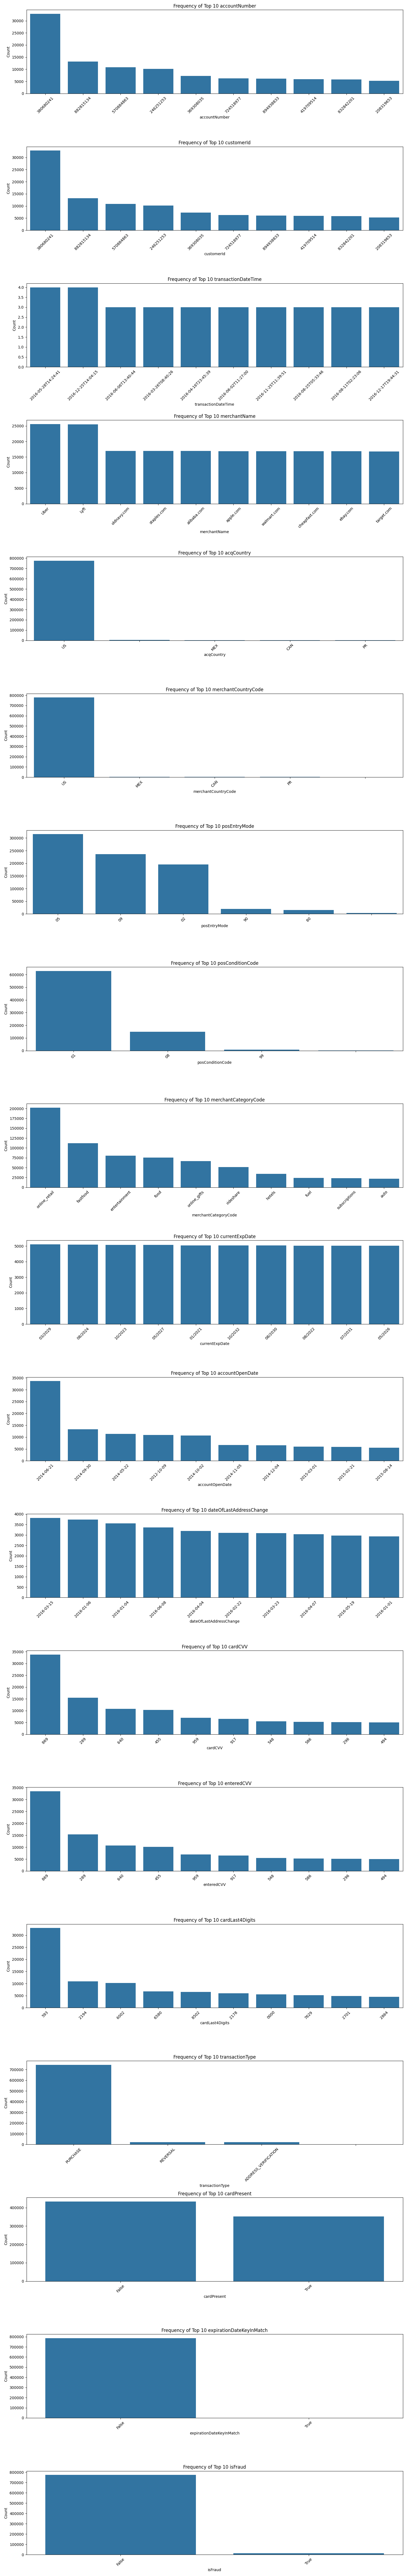

In [1]:
# Insert visualization/cat_plots.png
from IPython import display
display.Image("../visualization/cat_plots.png")

Examining the visualization above, it's evident that certain categorical features exhibit a significant imbalance in class distribution, notably the `isFraud` column. To address this, we will undertake additional preprocessing steps on the data. 

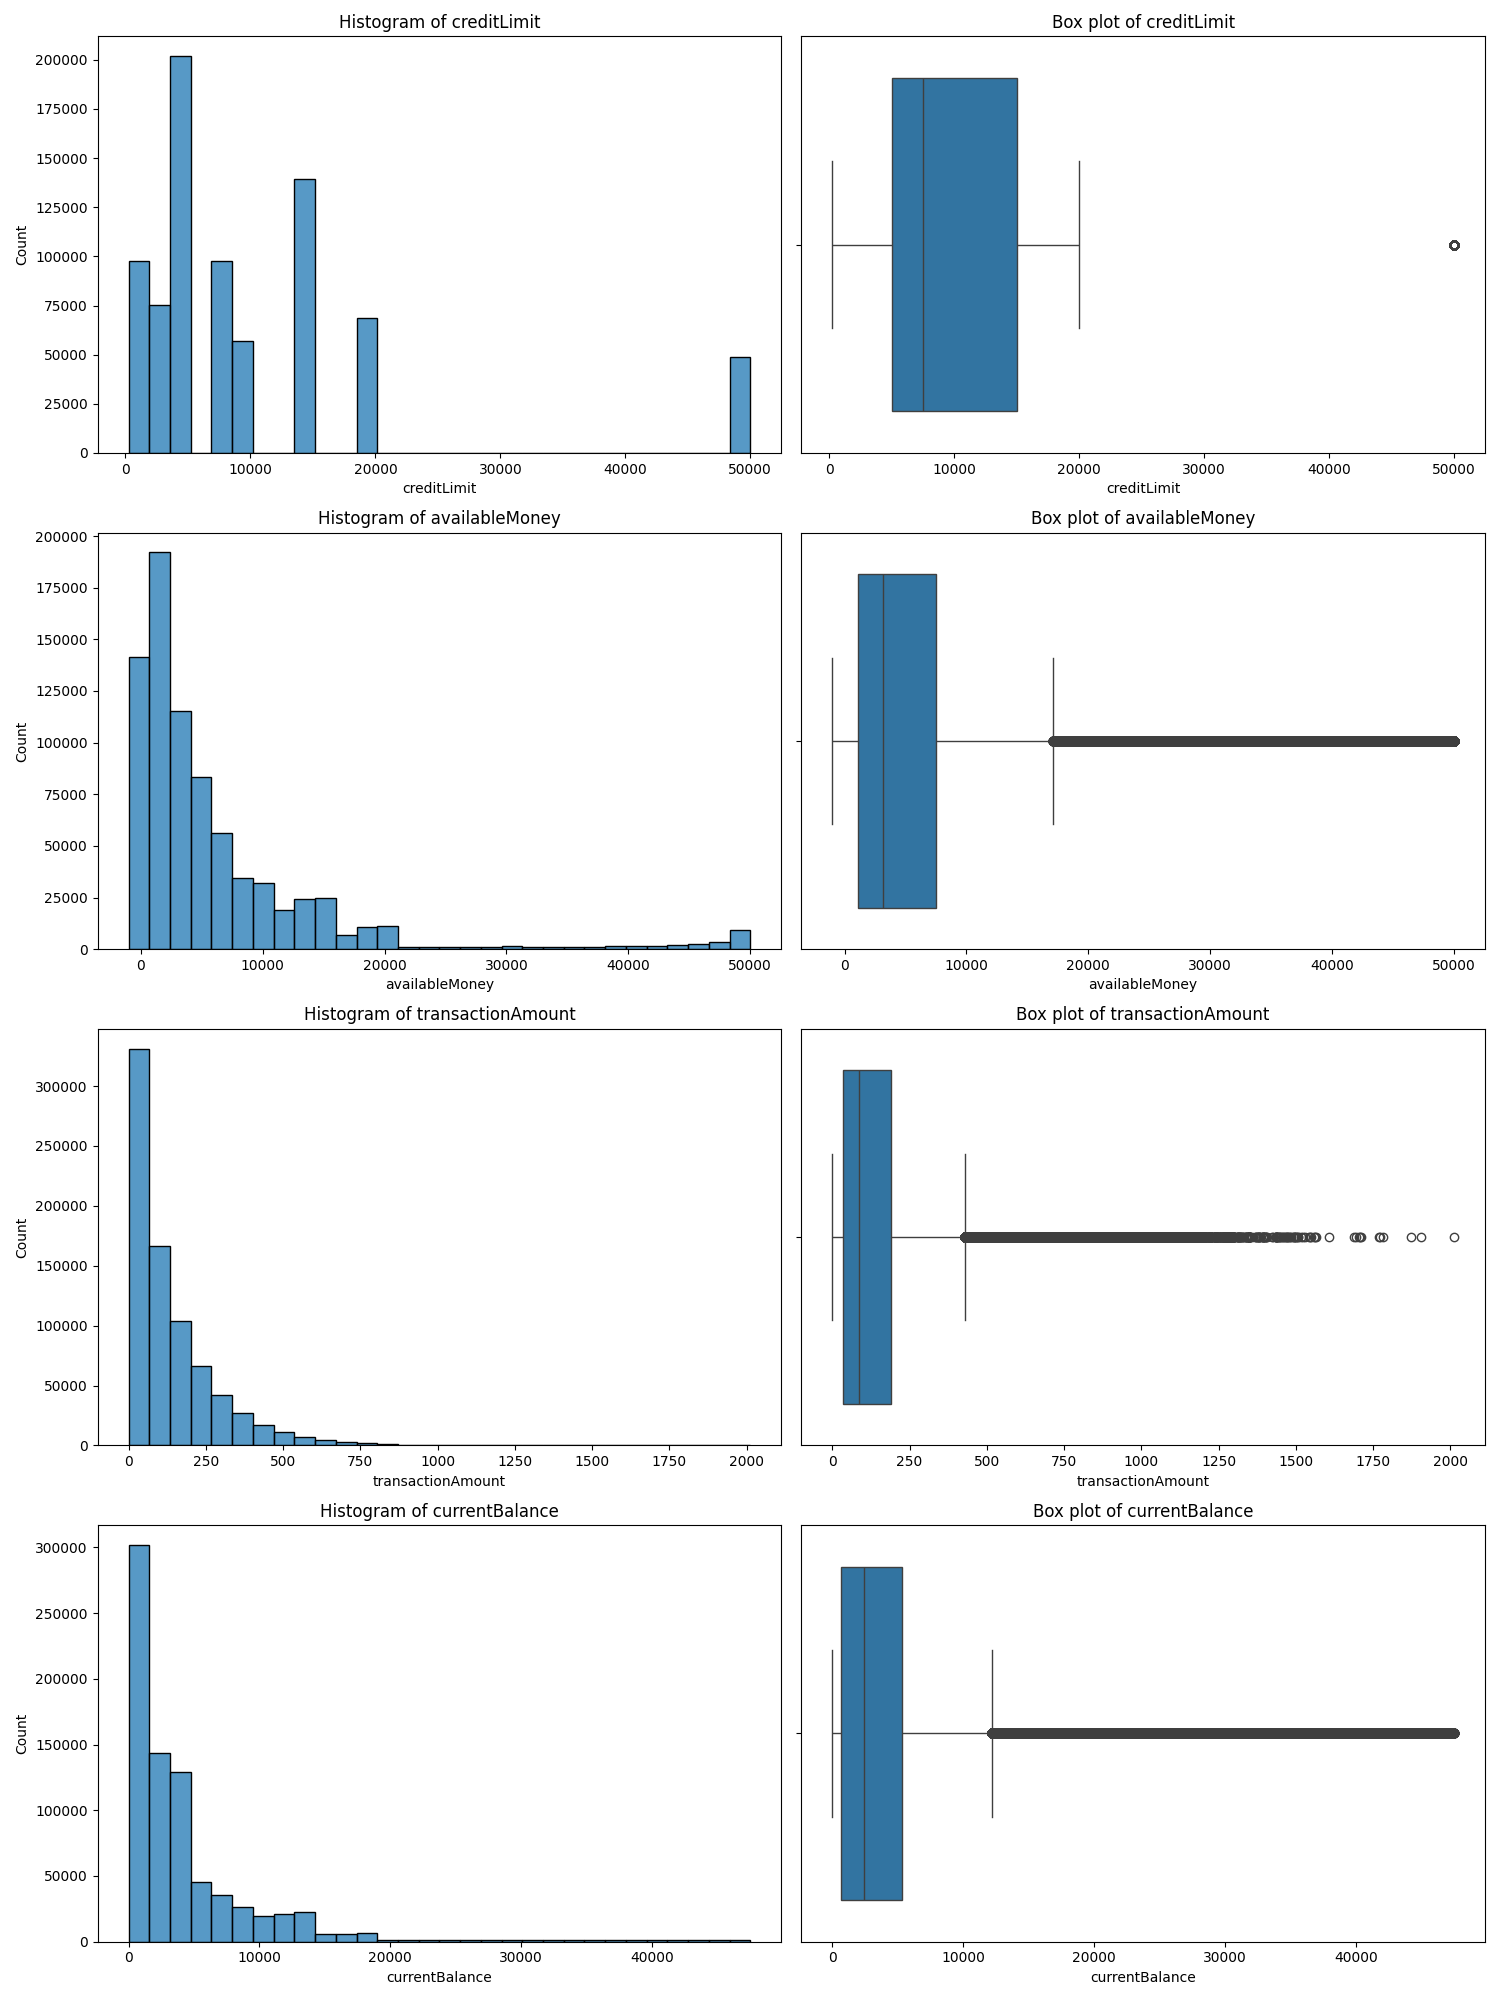

In [2]:
# Insert visualization/num_plots.png
from IPython import display
display.Image("../visualization/num_plots.png")

We also see significantly skewed distributions of our numerical features. Thus, we will be using *median* as our measure of central tendency when standardizing the numerical features. 

### Preprocessing

In [3]:
# Insert data/preprocessed/count_df.csv
from IPython import display
import pandas as pd
count_df = pd.read_csv("../data/preprocessed/count_df.csv")
display.display(count_df)

,feature,unique_entry_counts
0,cardLast4Digits,5246
1,accountNumber,5000
2,customerId,5000
3,merchantName,2490
4,dateOfLastAddressChange,2184
5,accountOpenDate,1820
6,currentExpDate,165
7,merchantCategoryCode,19
8,posEntryMode,6
9,acqCountry,5


As seen from the dataframe above, we have seen way too many unique entries for a few categorical features, including `accountNumber` and `customerId`. Thus we will apply a function to narrow down the number of unique entries; once the number of unique entries in a column is **greater than 10**, `generalize_categories` function will classify entries that appear less than 10% in our dataset as "Others". 

To reduce the number of features, we decided to drop `currentExpDate` and `dateOfLastAddressChange`, where none of the entries have frequency of 10% or higher. We decided to drop the two columns as they seem to carry little to no predictive power.

As seen from the distribution of numerical columns above (refer to the boxplots), we can see that `creditLimit` column has a single outlier, whereas the other columns have multiple outliers. To intrapolate the missing values, we decided to use `strategy="median"` for the other columns, and `strategy="mean"` for `creditLimit`. This decision stems from the fact that median is a measure of central tendency that is more robust to outliers. Thus, we will be building two separate `SimpleImputer()` for each of mean and median strategies.

Our final transformed data has 52 features, which we will be using to build classification models. 

## Results

In [4]:
# Add data/preprocessed/model_table.csv
from IPython import display
model_result = pd.read_csv("../data/preprocessed/model_table.csv")
display.display(model_result)

,rank_test_score,mean_test_score,mean_train_score,param_logisticregression__C,param_logisticregression__solver,mean_fit_time
0,1,0.062271,0.062268,0.01,newton-cholesky,7.329305
1,2,0.062249,0.062264,0.01,lbfgs,12.698590
2,3,0.062030,0.062123,0.10,lbfgs,8.510266
3,4,0.062027,0.062116,0.10,newton-cholesky,6.836031
4,5,0.062017,0.062116,1.00,newton-cholesky,5.989916
5,6,0.062014,0.062116,10.00,newton-cholesky,6.465390
6,7,0.062013,0.062116,100.00,newton-cholesky,8.452624
7,8,0.061975,0.062117,100.00,lbfgs,8.718760
8,9,0.061970,0.062118,1.00,lbfgs,9.220388
9,10,0.061964,0.062116,10.00,lbfgs,10.012676


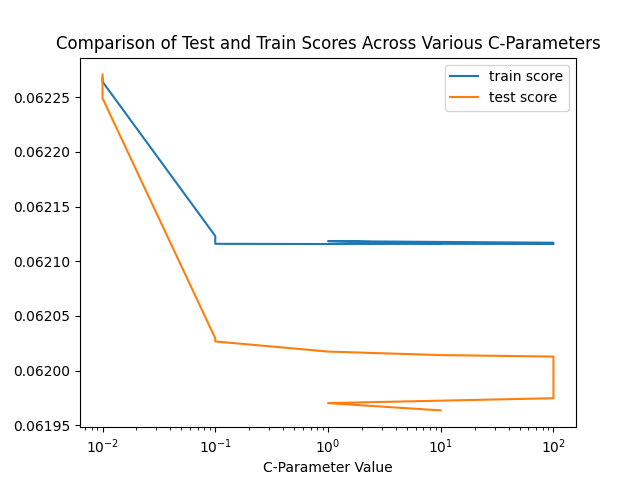

In [5]:
# Add visualization/score_comparison.png 
from IPython import display
display.Image("../visualization/score_comparison.png")

In our effort to distinguish between fraudulent and non-fraudulent transactions in customer accounts, we evaluated three classification models: Logistic Regression, Random Forest Classifier, and Gradient Boost Classifier. The primary challenge was the extreme imbalance in our dataset.

Based on the provided confusion matrices and F1 scores for the train and test sets, it is evident that there is a discrepancy in the performance of the machine learning model between the training and testing phases. For the training set, the model achieved an F1 score of 0.6024, which is a moderate score indicating a reasonable balance between precision and recall for the fraud class. However, the test set's F1 score dropped significantly to 0.0343, suggesting that the model is not generalizing well to unseen data.

The confusion matrix for the training data shows that the model identified a considerable number of true positives (4334) but also misclassified a significant number of non-fraud cases as fraud (5607). In contrast, the test confusion matrix reveals that while the model was conservative in predicting fraud (only 58 true positives), it also produced a large number of false negatives (2418), indicating many fraudulent transactions were not detected.

Given these results, the selection of Logistic Regression over other models like Random Forest and Gradient Boost Classifier can be justified by its better performance in the training phase and its simplicity, which makes it easier to interpret and implement. Logistic Regression's linear nature allows for a clear understanding of feature importance and the relationship between variables, which could be beneficial for further tuning and transparency in fraud detection systems.

## Discussion

In our effort to distinguish between fraudulent and non-fraudulent transactions in customer accounts, we evaluated three classification models: Logistic Regression, Random Forest Classifier, and Gradient Boost Classifier. The primary challenge was the extreme imbalance in our dataset.

Based on the provided confusion matrices and F1 scores for the train and test sets, it is evident that there is a discrepancy in the performance of the machine learning model between the training and testing phases. For the training set, the model achieved an F1 score of 0.6024, which is a moderate score indicating a reasonable balance between precision and recall for the fraud class. However, the test set's F1 score dropped significantly to 0.0343, suggesting that the model is not generalizing well to unseen data.

The confusion matrix for the training data shows that the model identified a considerable number of true positives (4334) but also misclassified a significant number of non-fraud cases as fraud (5607). In contrast, the test confusion matrix reveals that while the model was conservative in predicting fraud (only 58 true positives), it also produced a large number of false negatives (2418), indicating many fraudulent transactions were not detected.

Given these results, the selection of Logistic Regression over other models like Random Forest and Gradient Boost Classifier can be justified by its better performance in the training phase and its simplicity, which makes it easier to interpret and implement. Logistic Regression's linear nature allows for a clear understanding of feature importance and the relationship between variables, which could be beneficial for further tuning and transparency in fraud detection systems.

However, the stark difference between training and testing performance needs to be addressed. It is possible that Logistic Regression, despite its relative simplicity, is overfitting the training data and not capturing the underlying patterns that generalize to the test data. This situation calls for a more in-depth analysis of feature selection, potential regularization techniques to prevent overfitting, and the exploration of model ensembling or more sophisticated algorithms that could yield a better balance between bias and variance. Furthermore, it would be beneficial to explore and adjust the threshold for classification to improve sensitivity to fraud detection on the test set.

1. **Data Preprocessing and EDA (Exploratory Data Analysis)**

Data preprocessing is a vital step before introducing data into a machine learning model. EDA allowed us to scrutinize our features and determine appropriate methods for imputing missing values, processing numerical features, and transforming categorical features. Many columns had a significant portion of missing values; thus, removing these columns improved performance and reduced the risk of overfitting. For categorical features, we implemented one-hot encoding for binary categories and label encoding for those with more than two values, thus preventing the generation of excessive features and overfitting.

2. **Handling Imbalanced Data**

Addressing imbalanced data is challenging, particularly when non-fraudulent transactions significantly outnumber fraudulent ones. We used undersampling to reduce the size of the majority class, creating a balanced dataset for model training. This approach is crucial for models that typically do not generalize well on imbalanced datasets.

3. **Model Selection and Evaluation**

We applied cross-validation to three classification algorithms: Logistic Regression, Random Forest, and Gradient Boosting Classifier. Each model was chosen for its increasing complexity, allowing us to evaluate if more complex models enhance our ability to detect fraud.

   - *Logistic Regression*: We began with Logistic Regression due to its simplicity. However, as a linear model, it may not effectively capture complex, non-linear relationships.

   - *Random Forest*: We then progressed to the Random Forest Classifier, an ensemble method adept at detecting non-linear patterns.

   - *Gradient Boosting Classifier*: Lastly, we used the Gradient Boosting Classifier for its advanced boosting technique, aiming to refine predictive performance.

   - *Results*: Logistic Regression showed limited success, indicating the need for more complex models. Random Forest improved f1 scores but suggested potential underfitting. The Gradient Boost Classifier excelled in training but underperformed in testing, implying overfitting.

4. **Analysis of Model Performance**

The extreme imbalance in our data, with scarce instances of fraud, posed a significant challenge. This imbalance often leads to models that favor the majority class, resulting in poor performance in detecting fraud.

5. **Method**
 **Oversampling the Minority Class**: To counteract the imbalance between the high volume of non-fraudulent transactions and the relatively low incidence of fraudulent ones, we employed oversampling. This technique specifically focused on increasing the representation of the minority class (fraudulent transactions) in our dataset.

**Using Synthetic Minority Over-sampling Technique (SMOTE)**: As part of our oversampling strategy, we implemented SMOTE. This advanced technique generates synthetic but realistic samples of fraudulent transactions. By doing so, it aids in creating a more balanced dataset that better represents the characteristics of both classes.

**Data Preprocessing**: Prior to model training, we undertook rigorous data preprocessing. This included cleaning the data, handling missing values, and appropriately encoding categorical variables to ensure that the dataset was well-suited for effective model training.

**Model Training and Evaluation**: We trained various machine learning models on this balanced dataset. Our selection of models included those that are commonly effective in classification tasks, such as Logistic Regression, Random Forest, and Gradient Boosting Classifirs.

 **Cross-validation and Hyperparameter Tuning**: To ensure robustness and optimize performance, we utilized cross-validation techniques and conducted hyperparameter tuning for each model. This step was crucial to find the optimal settings for each classifier and to avoid issues like overfitting or underfitting.

**Performance Assessment**: We assessed the performance of each model using metrics suitable for imbalanced classification problems, such as the F1 score, precision-recall curve, and AUC-ROC curve. These metrics helped us in evaluating the models' ability to accurately identify fraudulent tran
   
6. **Future Directions and Improvements**  *

Our preliminary investigations highlight the need for further model refinement. Our plans include:

   - *Resampling Techniques*: We will explore oversampling of the minority class (fraudulent transactions) using methods like SMOTE for synthetic sample generation.

   - *Feature Engineering*: We aim to incorporate frequency encoding, particularly for 'merchant_name', to improve model sensitivity to potential fraud indicators.

   - *Adjusting Classification Threshold*: We plan to experiment with different thresholds to optimize the precision-recall balance.

   - *Scoring Metrics*: Given the importance of recall, we will prioritize it in our evaluations while also considering precision. This includes experimenting with precision-recall curves and alternative loss functions such as 'Weighted Cross-Entropy' and 'Focal Loss', tailored for imbalanced datasets.

   - *AUC-ROC Curve Metrics*: We are considering adopting AUC-ROC curve metrics for a more comprehensive evaluation, particularly effective in imbalanced datasets.

7. **Model Complexity and Resource Management**

We will explore more complex models or ensemble methods, such as neural networks, to capture intricate data patterns. However, we will prioritize resource efficiency in model productionization.

## References

```{bibliography}
```